
===== Logistic Regression =====
Accuracy:  0.96
Precision: 0.96
Recall:    0.95
F1 Score:  0.96
Confusion Matrix:
 [[1111   46]
 [  55 1074]]
ROC AUC Score: 0.99

===== Decision Tree =====
Accuracy:  0.93
Precision: 0.93
Recall:    0.93
F1 Score:  0.93
Confusion Matrix:
 [[1082   75]
 [  74 1055]]
ROC AUC Score: 0.93

===== XGBoost =====


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy:  0.97
Precision: 0.97
Recall:    0.97
F1 Score:  0.97
Confusion Matrix:
 [[1128   29]
 [  32 1097]]
ROC AUC Score: 1.00

===== Random Forest =====
Accuracy:  0.97
Precision: 0.98
Recall:    0.96
F1 Score:  0.97
Confusion Matrix:
 [[1130   27]
 [  43 1086]]
ROC AUC Score: 0.99


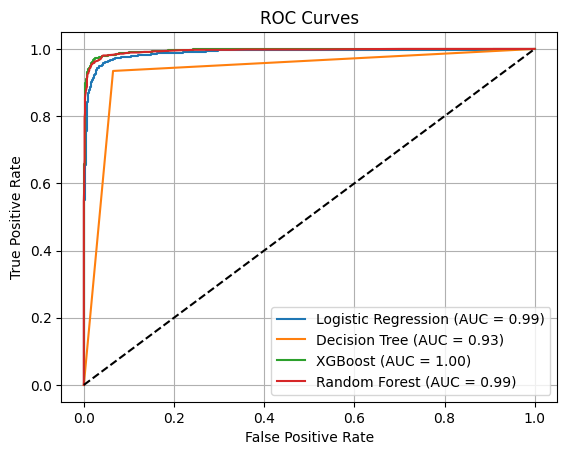

Random sample indices from test set (position within X_test): [1678  403 1108  220 1621]
Sample 1 (Test set position: 1678):
  Actual:   Legitimate
  Predicted:Legitimate

Sample 2 (Test set position: 403):
  Actual:   Legitimate
  Predicted:Legitimate

Sample 3 (Test set position: 1108):
  Actual:   Phishing
  Predicted:Phishing

Sample 4 (Test set position: 220):
  Actual:   Legitimate
  Predicted:Legitimate

Sample 5 (Test set position: 1621):
  Actual:   Legitimate
  Predicted:Legitimate



In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier






# 2: Loading the dataset
df = pd.read_csv("dataset_phishing.csv")

# 5: Preparing the x & y cloumn 
X = df.drop(['url', 'status'], axis=1)
y = df['status']

# 1. Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # ROC AUC
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc:.2f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Finalize plot
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# 10: predicting from random rows between actual and predicted

# 5 random rows
sample_indices = np.random.choice(len(X_test), size=5, replace=False)

print("Random sample indices from test set (position within X_test):", sample_indices)

X_sample = X_test[sample_indices]
y_sample_actual = y_test.iloc[sample_indices]  
y_sample_pred = model.predict(X_sample)

label_map = {0: 'Legitimate', 1: 'Phishing'}

for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1} (Test set position: {idx}):")
    print(f"  Actual:   {label_map[y_sample_actual.iloc[i]]}")
    print(f"  Predicted:{label_map[y_sample_pred[i]]}")
    print()



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Running SHAP...


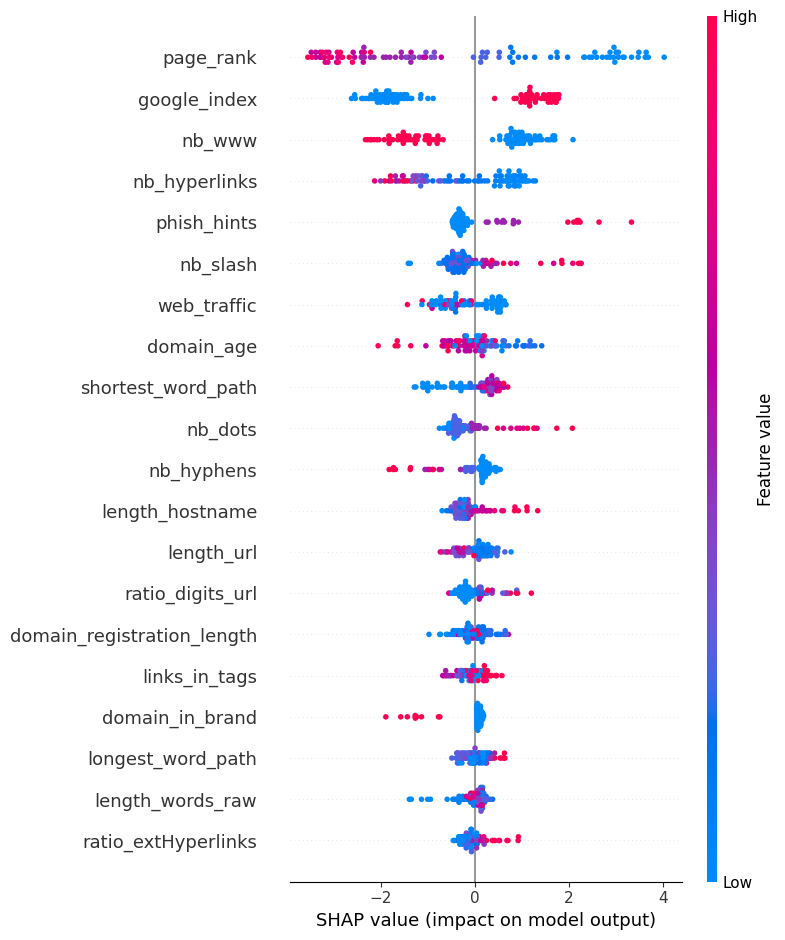

Running LIME...


In [6]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("dataset_phishing.csv")
X = df.drop(['url', 'status'], axis=1)
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# ===================== SHAP ======================
print("Running SHAP...")
explainer_shap = shap.Explainer(model, X_train_scaled)
shap_values = explainer_shap(X_test_scaled[:100])

# Summary Plot (SHAP)
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

# ===================== LIME ======================
print("Running LIME...")
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=["Legitimate", "Phishing"],
    mode='classification'
)

# Explain a single instance (e.g., first one)
exp = explainer_lime.explain_instance(X_test_scaled[0], model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)

# Optional: Save to HTML
exp.save_to_file('lime_explanation.html')
